# Синтетическая выборка

## Импорты и начальные данные

In [1]:
import numpy as np
import scipy.stats as st
from statsmodels.stats.proportion import proportions_ztest

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

### Параметры

- $p_L$ - нижняя граница
- $p_U$ - верхняя граница
- $\alpha$ - уровень значимости, допускаемая вероятность ошибки первого рода: отвергнуть верную $H_0$ (при $p \le p_L$)
- $\beta$ - допускаемая вероятность ошибки второго рода: принять неверную $H_0$ (при $p \ge p_U$)

In [3]:
pl = 0.45
pu = 0.55
alpha = beta = 0.05
A = (1 - beta) / alpha
B = beta / (1 - alpha)

def a_m(m):
    return (np.log(B) + m * np.log((1 - pl) / (1 - pu))) / (np.log(pu / pl) - np.log((1 - pu) / (1 - pl)))

def r_m(m):
    return (np.log(A) + m * np.log((1 - pl) / (1 - pu))) / (np.log(pu / pl) - np.log((1 - pu) / (1 -pl)))

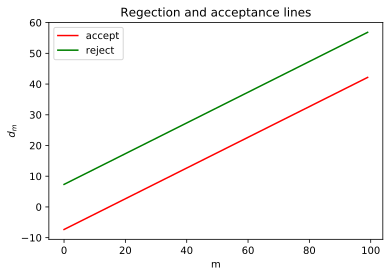

In [4]:
plt.plot(range(100), [a_m(i) for i in range(100)], label='accept', color='red')
plt.plot(range(100), [r_m(i) for i in range(100)], label='reject', color='green')
plt.xlabel('m')
plt.ylabel('$d_m$')
plt.legend(loc='best')
_ = plt.title('Regection and acceptance lines')

### Z-критерий меток для доли (лекция 2: параметрические гипотезы) и последовательный анализ для проверки $p$

Сравним результаты последовательного анализа и z-теста меток для доли

Последовательный анализ:

$H_0:\ p \le p_L$ 

$H_1:\ p \ge p_U$

Критерий меток доли (левосторонняя альтернатива):

$H_0:\ p = p_0$ 

$H_1:\ p < p_0$

#### Генерация данных ($Ber(p)$) и проверка z-критерием меток

In [5]:
def generate_and_test(real_p, test_func, maxm=500, seed=42):
    """
    Генерация выборки из бернуллиевских величин, генерация останавливается, когда при последовательном анализе мы отвергаем
    или принимаем H_0 и одновременно то же делает z-test
    :param real_p - p
    :param test_func - функция для проверки z-теста, возвращает p-value
    :param maxm - максимальный размер выборки
    :return полученная выборка, массив p-value, номер первой итерации, где график вышел за пределы полосы
    """
    rs = np.random.RandomState(seed)
    sample = []
    pvals = []
    m = 0
    test_iter_num = -1 # номер итерации, где отвергается гипотеза по z-тесту
    iter_num = -1 # номер итерации, где мы выходим за пределы области безразличия (между двумя accept и reject)
    while m < maxm and (iter_num < 0 or test_iter_num < 0):
        m += 1
        x = rs.uniform() <= real_p
        sample += [x]
        pvals.append(test_func(sample))
        if iter_num < 0 and (np.sum(sample) <= a_m(m) or np.sum(sample) >= r_m(m)):
            iter_num = m
            
        if pvals[-1] < 0.05:
            test_iter_num = m

    return sample, pvals, iter_num

In [6]:
def plot_seq_ztest_results(sample, bin_test):
    max_l = len(sample)
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(121)
    ax1.plot(np.cumsum(sample), label='actual d_m')
    ax1.plot(range(max_l), [a_m(i) for i in range(max_l)], label='accept', color='green')
    ax1.plot(range(max_l), [r_m(i) for i in range(max_l)], label='reject', color='red')
    ax1.legend(loc='best')
    ax1.set_xlabel('m')
    ax1.set_ylabel('$d_m$')
    ax1.set_title('Sequential analysis')

    ax2 = fig.add_subplot(122)
    ax2.plot(bin_test)
    ax2.set_xlabel('m')
    ax2.set_ylabel('p-value')
    ax2.set_title('Z-tests')

#### $p=0.4$

In [8]:
len(sample)

233

/home/twlvth/.pyenv/versions/venv3.6/lib/python3.6/site-packages/statsmodels/stats/weightstats.py:671: RuntimeWarning: divide by zero encountered in double_scalars
  zstat = value / std_diff


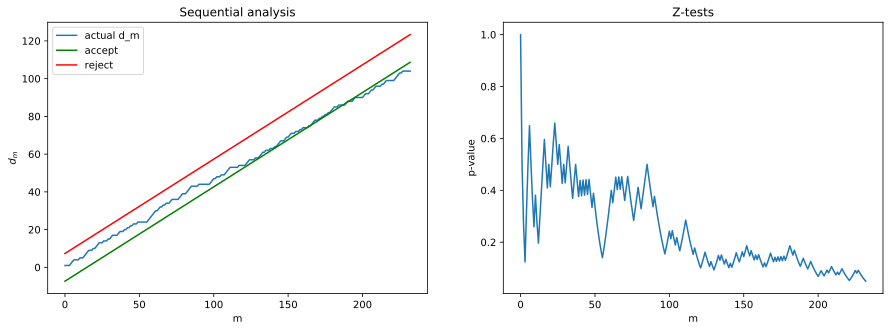

In [7]:
sample, bin_test, _ = generate_and_test(0.4, test_func=lambda x: proportions_ztest(np.sum(x), len(x), 0.5, 'smaller')[1])
plot_seq_ztest_results(sample, bin_test)

#### $p=0.6$

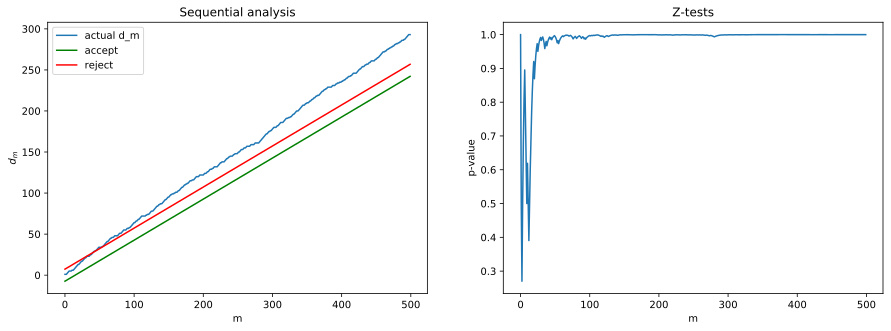

In [9]:
sample, bin_test, _ = generate_and_test(0.6, test_func=lambda x: proportions_ztest(np.sum(x), len(x), 0.5, 'smaller')[1])
plot_seq_ztest_results(sample, bin_test)

#### $p=0.5$

In [11]:
pl, pu

(0.45, 0.55)

In [13]:
min(bin_test)

0.12410653949496181

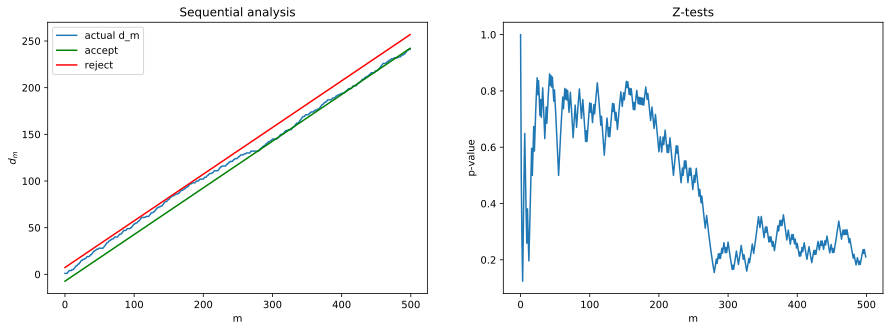

In [10]:
sample, bin_test, _ = generate_and_test(0.5, test_func=lambda x: proportions_ztest(np.sum(x), len(x), 0.5, 'smaller')[1])
plot_seq_ztest_results(sample, bin_test)

Пройдемся по сидам и посмотрим максимально возможное число объектов

379


Text(0, 0.5, 'p-value')

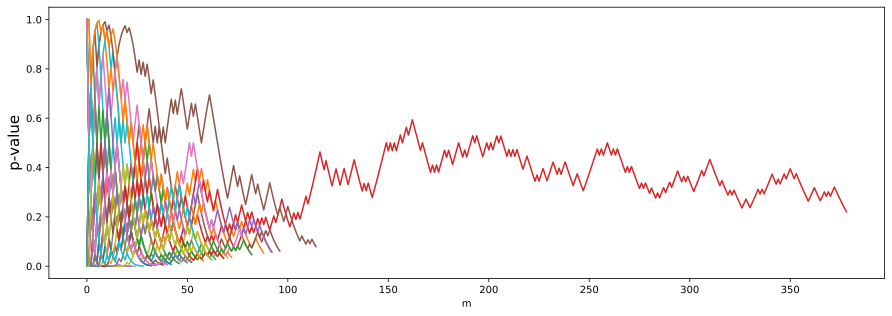

In [14]:
max_l = 0
bin_tests = []
iter_nums = []
for i in range(30):
    sample_, bin_test, iter_num = generate_and_test(0.4, seed=i, test_func=lambda x: proportions_ztest(np.sum(x), len(x), 0.5, 'smaller' )[1])
    max_l_ = len(sample_)
    max_l = max(max_l_, max_l)
    iter_nums.append(iter_num)
    bin_tests.append(bin_test)
print(max_l)

plt.figure(figsize=(15, 5))
for t in bin_tests:
    plt.plot(t)        
plt.xlabel('m')
plt.ylabel('p-value', fontdict={'size': 15})

Разница в размерах итоговых выборок

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 3., 1., 5., 4., 6., 3., 6.]),
 array([-379. , -366.6, -354.2, -341.8, -329.4, -317. , -304.6, -292.2,
        -279.8, -267.4, -255. , -242.6, -230.2, -217.8, -205.4, -193. ,
        -180.6, -168.2, -155.8, -143.4, -131. , -118.6, -106.2,  -93.8,
         -81.4,  -69. ,  -56.6,  -44.2,  -31.8,  -19.4,   -7. ]),
 <a list of 30 Patch objects>)

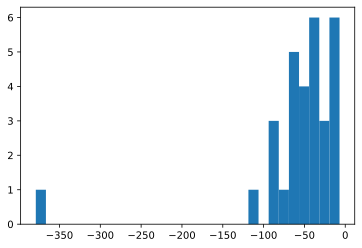

In [15]:
min_num = []
for p in bin_tests:
    min_num.append(np.where(np.array(p) <= 0.05)[0][0])
min_num = np.array(min_num)
plt.hist(min_num-np.array(iter_nums), bins=30)

### Последовательный тест Вальда из коробки

- $h_0 == H_0$ 
- $h_1 == H_1$

Decision:	Continue

     values    lower    upper
n                            
491     236  228.179  237.894
492     236  228.654  238.369
493     237  229.128  238.844
494     238  229.603  239.318
495     239  230.077  239.793
496     240  230.552  240.268
497     240  231.027  240.742
498     241  231.501  241.217
499     241  231.976  241.691
500     241  232.451  242.166


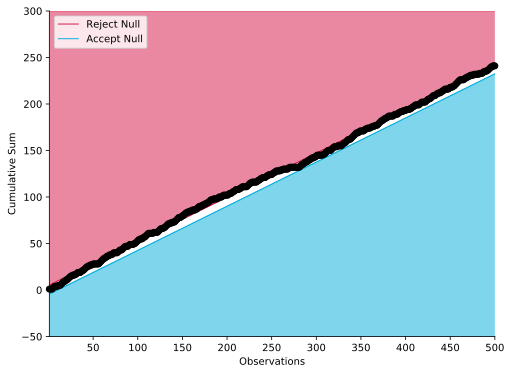

In [18]:
import sprt
rs = np.random.RandomState(42)
values = rs.uniform(size=500) <= 0.5
test = sprt.SPRTBinomial(alpha=alpha, beta=beta, h0=0.4, h1=0.55, values=values)
test.plot()